**ASSIGNMENT 1**

Nama: Aulia Putri Hidayat

Kode Peserta: PYTN-KS14-023
***

## Import Library

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import folium
from folium import plugins

In [2]:
#Membaca data file csv
df = pd.read_csv("london_crime_by_lsoa.csv")
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [3]:
#Sample data
#melihat 5 baris pertama dari DataFrame
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
#Menampilkan n record terakhir
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
#Menampilkan dataframe secara acak
df.sample(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
363861,E01003186,Lambeth,Robbery,Personal Property,2,2013,6
12859247,E01004681,Westminster,Theft and Handling,Other Theft Person,2,2016,8
13247648,E01000370,Bexley,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2016,12
3527240,E01001171,Croydon,Theft and Handling,Handling Stolen Goods,0,2010,8
3110197,E01003420,Merton,Violence Against the Person,Wounding/GBH,0,2011,12
13184011,E01002516,Hillingdon,Other Notifiable Offences,Other Notifiable,0,2009,9
12973948,E01003655,Redbridge,Violence Against the Person,Common Assault,0,2009,1
6494130,E01002763,Islington,Theft and Handling,Other Theft Person,1,2016,1
12592095,E01002044,Haringey,Burglary,Burglary in a Dwelling,4,2009,4
12936938,E01002859,Kensington and Chelsea,Burglary,Burglary in a Dwelling,0,2012,10


In [6]:
#Dimensi dataframe (rows, columns)
#Mengetahui dimensi dari dataframe atau ukuran baris dan kolomnya
df.shape

(13490604, 7)

## Data Cleaning

In [7]:
#Melakukan pengecekan missing value
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [8]:
df.isna()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13490599,False,False,False,False,False,False,False
13490600,False,False,False,False,False,False,False
13490601,False,False,False,False,False,False,False
13490602,False,False,False,False,False,False,False


In [9]:
#Melakukan pengecekan data terduplikat
df.duplicated().sum()

0

Diperoleh bahwa:
- Tidak terdapat data kosong
- Tidak terdapat data terduplikat

## Exploratory Data Analysis

In [10]:
#Melakukan pengambilan data dengan value >=1 atau !=0
df = df[df.value >=1]
#df1 = df[df.value != 0]
df

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...,...
13490581,E01000789,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [11]:
df.shape

(3419099, 7)

## Line Chart
#### Melihat fluktuasi trend data atau perubahan suatu kondisi dari waktu ke waktu secara kontinu

##### Bagaimana perubahan kejahatan major yang terjadi pada tahun 2008-2016?

In [12]:
#Membuat dataframe dengan style spreadsheet pivot table
#Menganalisis data kolom major_category
dataMajor = df.pivot_table(values="value", index=["year"],columns=["major_category"], aggfunc=np.sum, fill_value=0)
dataMajor

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


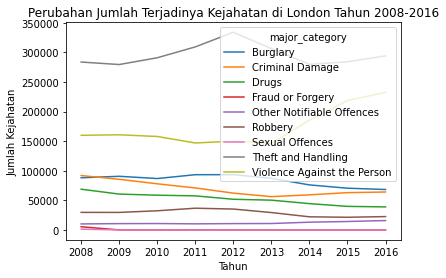

In [13]:
#Membuat line chart
dataMajor.plot()
plt.rcParams["figure.figsize"] = [17,14]
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kejahatan") 
plt.title("Perubahan Jumlah Terjadinya Kejahatan di London Tahun 2008-2016")

plt.show()

Dari data di atas dapat disimpulkan bahwa:
- Kejahatan kategori Theft and Handling dan Violence Against the Person cenderung mengalami perubahan jumlah kejahatan yang signifikan dibanding kejahatan lainnya.
- Kejahatan kategori bulglary, drugs, robbery, fraud or forgery terjadi penurunan pada tahun-tahun akhir, yakni mulai tahun 2014.

## Area Plot
#### Menunjukkan volume data yang diwakili oleh garis, biasanya digunakan untuk melihat tren data dari waktu ke waktu

##### Kejahatan major apa saja yang mengalami perubahan signifikan dan tidak?

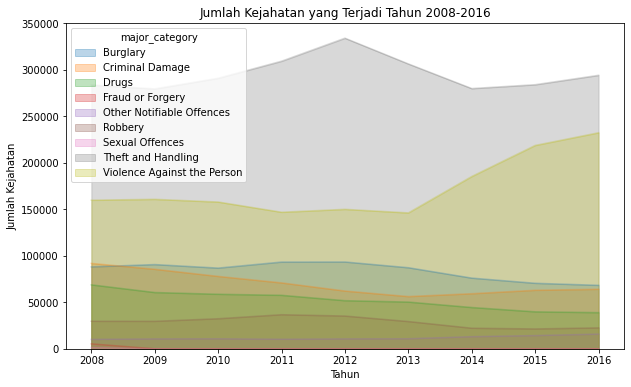

In [14]:
#Membuat area plot
dataMajor.plot(kind="area",
           alpha=0.30,
           stacked=False,
           figsize=(10, 6),
          )

plt.title("Jumlah Kejahatan yang Terjadi Tahun 2008-2016")
plt.ylabel("Jumlah Kejahatan") 
plt.xlabel("Tahun") 

plt.show()

Berdasarkan area plot di atas, dapat disimpulkan bahwa:
- Pergerakan jumlah Sexual Offences dan Fraud or Forgery tidak mengalami perubahan yang signifikan.
- Theft and Handling dan Violence Against the Person merupakan kategori kejahatan dengan jumlah terbanyak dan mengalami pergerakan yang signifikan.

## Histogram
#### Melihat frekuensi data-data numerik yang bersifat kontinu

##### Apa jenis kejahatan minor yang paling banyak terjadi dan paling sedikit terjadi?

In [15]:
#Menampilkan total kategori kejahatan kecil tiap tahun
dataMinor = df.pivot_table(values="value", index=["year"],columns=["minor_category"], aggfunc=np.sum, fill_value=0)
dataMinor

minor_category,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking,...,Other Theft Person,Other violence,Personal Property,Possession Of Drugs,Rape,Theft From Motor Vehicle,Theft From Shops,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Wounding/GBH
year,,,,,,,,,,,,,,,,,,,,,
2008,56586,31437,56655,2964,37356,3840,23519,41693,9011,4203,...,24453,7721,26663,64228,268,76570,32857,28303,15895,8701
2009,55297,30434,60185,3115,39671,0,22475,36621,8348,4172,...,27549,7571,26453,56070,0,68856,36349,24476,20721,10005
2010,54173,29703,57123,3041,41591,0,20253,32907,7962,4252,...,29547,6947,29300,54026,0,69709,36935,24890,19726,8033
2011,50768,30876,62439,2685,40502,0,18037,29494,7445,4460,...,36090,6414,33994,52769,0,69604,36351,26161,20885,7628
2012,50369,31676,61716,2450,39246,0,15330,25777,6753,3964,...,46585,6623,32810,47491,0,68198,36562,22464,21339,7151
2013,39929,30685,56537,2026,37882,0,13512,23452,6367,4151,...,44964,7628,27311,45755,0,63509,36441,20377,18708,15526
2014,45677,27078,48975,1642,51244,0,13391,24137,6641,3830,...,30957,7785,20508,40309,0,52167,40141,21653,17186,21556
2015,48164,25833,44656,1718,61758,0,13648,25595,6776,3395,...,33829,9501,19665,36097,0,50024,42549,21848,16513,23431
2016,50038,25289,42996,1654,64440,0,13951,25787,6700,3392,...,34868,10588,20874,35203,0,51319,46957,26366,18001,23525


In [16]:
#Melakukan pengelompokan data menurut kolom minor_category untuk mendapatkan total value berurut dari terendah hingga tertinggi
df.groupby("minor_category", sort=True)["value"].sum().sort_values(ascending=True)

minor_category
Rape                                         268
Murder                                       949
Other Sexual                                1005
Other Fraud & Forgery                       1485
Other Drugs                                 2998
Counted per Victim                          3840
Going Equipped                              5530
Handling Stolen Goods                      16100
Business Property                          21295
Drug Trafficking                           35819
Offensive Weapon                           37983
Motor Vehicle Interference & Tampering     56224
Criminal Damage To Other Building          66003
Other violence                             70778
Other Notifiable                          100819
Wounding/GBH                              125556
Other Criminal Damage                     145356
Criminal Damage To Dwelling               154116
Theft/Taking of Pedal Cycle               168974
Theft/Taking Of Motor Vehicle             216538
Perso

Text(0, 0.5, 'Total Kejahatan')

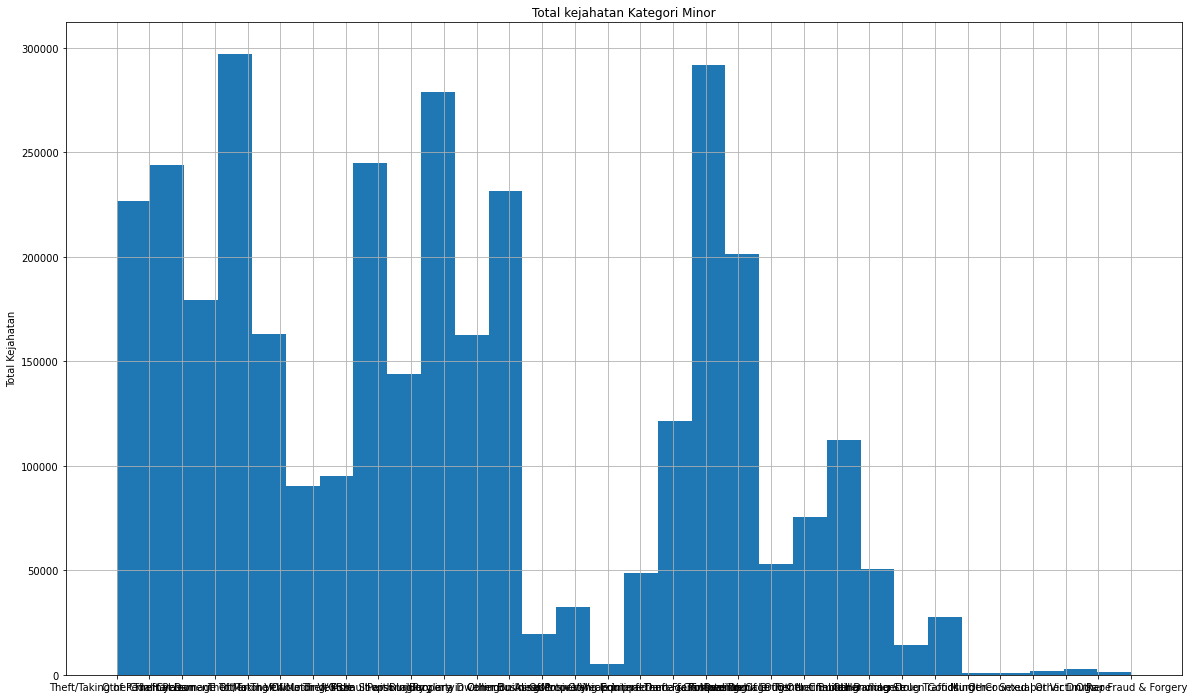

In [17]:
#Membuat histogram
df.minor_category.hist(bins=30, figsize=(20, 12))

plt.title("Total kejahatan Kategori Minor")
plt.ylabel("Total Kejahatan")


Berdasarkan data dalam histogram di atas dapat disimpulkan bahwa:
- Kejahatan minor yang paling banyak terjadi di London pada tahun 2008-2016 ialah Other Theft, sedangkan yang paling sedikit ialah Rape.

## Bar Chart
#### Menampilkan perbandingan data dari kategori yang berbeda

##### Bagaimana urutan kejahatan major dari yang paling banyak terjadi hingga ke yang paling sedikit terjadi?

In [18]:
#Melakukan pengelompokan data menurut kolom major_category untuk mendapatkan total kejahatan yang terjadi tiap kategorinya
majorCrimes = df.groupby("major_category")["value"].sum().sort_values(ascending=False)
majorCrimes

major_category
Theft and Handling             2661861
Violence Against the Person    1558081
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Robbery                         258873
Other Notifiable Offences       106349
Fraud or Forgery                  5325
Sexual Offences                   1273
Name: value, dtype: int64

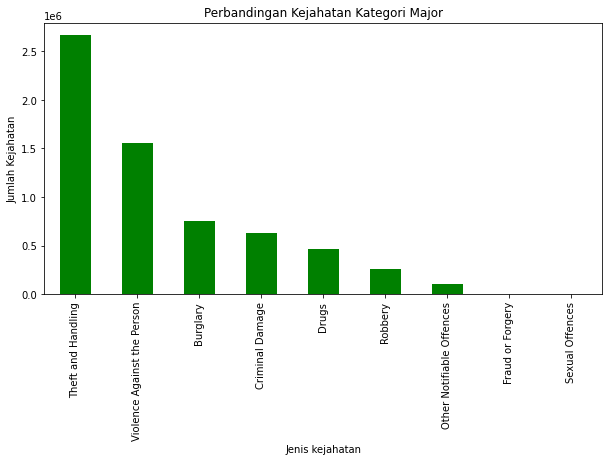

In [19]:
#Membuat bar chart
majorCrimes.plot(kind="bar",color="green", figsize=(10,5))
plt.title("Perbandingan Kejahatan Kategori Major")
plt.xlabel("Jenis kejahatan")
plt.ylabel("Jumlah Kejahatan") 

plt.show()

Kesimpulan yang didapat dari bar chart di atas, yaitu:
- Kejahatan kategori major yang paling sering terjadi yaitu Theft and Handling dengan jumlah 2 juta kejahatan dan yang paling sedikit terjadi ialah Sexual Offences dengan jumlah 1200an kejahatan.
- Urutan kejahatan kategori major dari yang banyak terjadi hingga yang paling sedikit yaitu Theft and Handling, Violence Against the Person, Burglary, Criminal Damage, Drugs, Robbery, Other Notifiable Offences Fraud or Forgery, baru kemudian Sexual Offences.

##### Kejahatan minor apa saja yang menjadi top 5 dengan jumlah kejahatan tertinggi?

In [20]:
#Melakukan pengelompokan data menurut kolom minor_category untuk mendapatkan total value berurut dari terendah hingga tertinggi
minorCrimes = df.groupby("minor_category")["value"].sum().sort_values(ascending=False)
minorCrimes

minor_category
Other Theft                               980085
Theft From Motor Vehicle                  569956
Burglary in a Dwelling                    491282
Harassment                                458124
Assault with Injury                       451001
Possession Of Drugs                       431948
Common Assault                            413690
Theft From Shops                          345142
Other Theft Person                        308842
Criminal Damage To Motor Vehicle          265463
Burglary in Other Buildings               263011
Personal Property                         237578
Theft/Taking Of Motor Vehicle             216538
Theft/Taking of Pedal Cycle               168974
Criminal Damage To Dwelling               154116
Other Criminal Damage                     145356
Wounding/GBH                              125556
Other Notifiable                          100819
Other violence                             70778
Criminal Damage To Other Building          66003
Motor

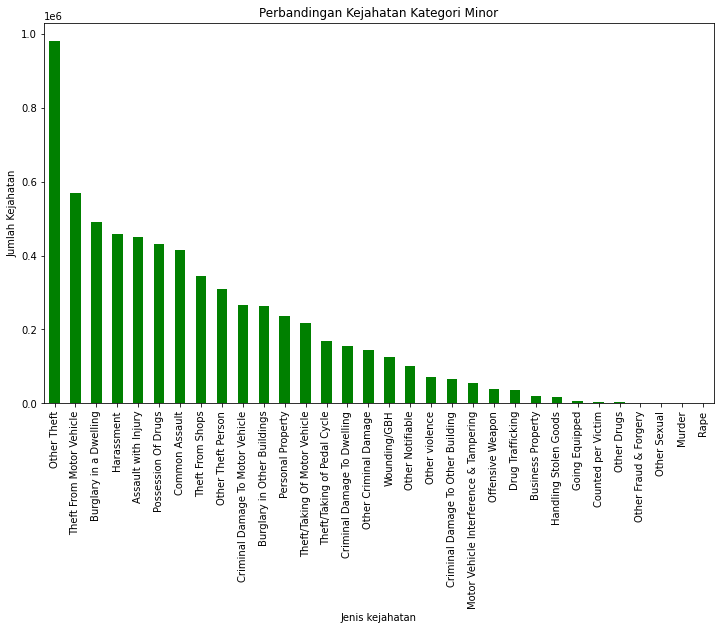

In [21]:
#Membuat bar chart
minorCrimes.plot(kind="bar",color="green", figsize=(12,7))
plt.title("Perbandingan Kejahatan Kategori Minor")
plt.xlabel("Jenis kejahatan")
plt.ylabel("Jumlah Kejahatan")
 
plt.show()

Kesimpulan yang didapat dari bar chart di atas, yaitu:
- Kejahatan kategori minor yang paling sering terjadi yaitu Other Theft dan yang paling sedikit terjadi ialah Rape.
- Urutan top 5 kejahatan kategori minor yang paling banyak terjadi diantaranya Other Theft, Theft From Motor Vehicle, Burglary in a Dwelling, Harassment, Assault with Injury.

## Pie Chart
#### Menampilkan perbandingan data dalam bentuk persentase

##### Berapa perbandingan kejahatan yang terjadi pada 5 wilayah (borough) dengan total jumlah kejahatan terbanyak?

In [22]:
#Mendapatkan top 5 wilayah dengan kejahatan terbanyak
df_borough = df.groupby("borough")["value"].sum().sort_values(ascending=False).head(5)
df_borough

borough
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Newham         262024
Name: value, dtype: int64

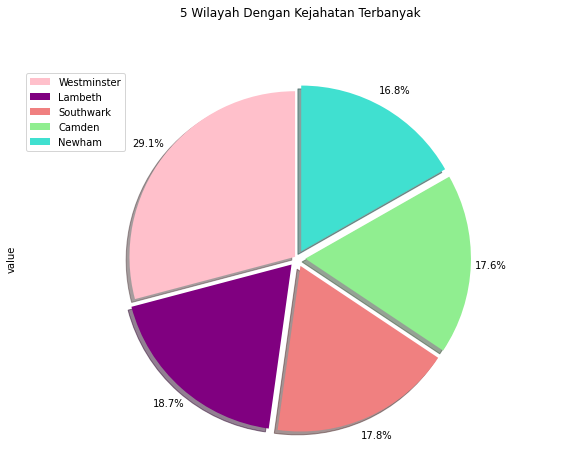

In [23]:
color_list = ["pink", "purple", "lightcoral", "lightgreen", "turquoise"]

explode_list = [0.015, 0.05, 0.05, 0.05, 0.05]

df_borough.plot(
                                kind = "pie",
                                figsize = (10, 7),  
                                autopct = '%1.1f%%',
                                startangle = 90,
                                shadow = True,
                                labels = None,
                                colors = color_list,
                                pctdistance = 1.12,      
                                explode = explode_list
                            )

plt.title("5 Wilayah Dengan Kejahatan Terbanyak", y=1.12)
plt.axis("equal")

plt.legend(labels=df_borough.index, loc="upper left")

plt.show()

Berdasarkan pie chart di atas, diperoleh kesimpulan:
- Wilayah Westminster merupakan wilayah dengan kejahatan terbanyak dengan persentase 29.1%, kemudian disusul oleh Lambeth, Southwark, Camden, dan yang terakhir Newham.

## Box Plot
#### Menunjukkan perbedaan antara populasi tanpa menggunakan asumsi distribusi statistik yang mendasari, menunjukkan derajat dispersi (penyebaran) dan skewness (kecondongan) dalam data

##### Bagaimana laporan kejahatan major yang terjadi tahun 2008-2016?

In [24]:
#Melakukan pemanggilan variabel dataMajor
print(dataMajor)

major_category  Burglary  Criminal Damage  Drugs  Fraud or Forgery  \
year                                                                 
2008               88092            91872  68804              5325   
2009               90619            85565  60549                 0   
2010               86826            77897  58674                 0   
2011               93315            70914  57550                 0   
2012               93392            62158  51776                 0   
2013               87222            56206  50278                 0   
2014               76053            59279  44435                 0   
2015               70489            62976  39785                 0   
2016               68285            64071  38914                 0   

major_category  Other Notifiable Offences  Robbery  Sexual Offences  \
year                                                                  
2008                                10112    29627             1273   
2009            

Text(0, 0.5, 'Jumlah Kejahatan')

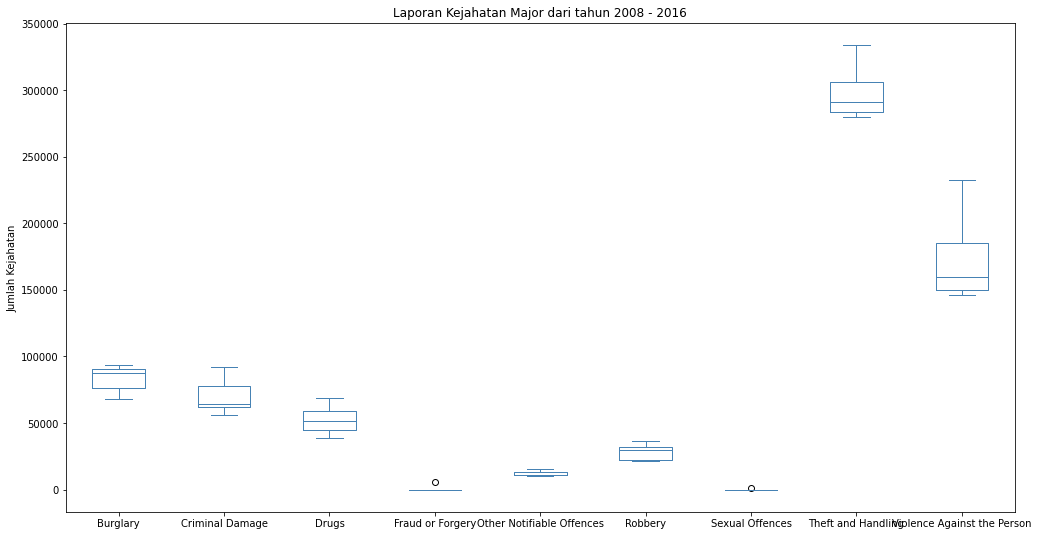

In [25]:
dataMajor.plot.box(figsize=(17, 9), color="steelblue")

plt.title("Laporan Kejahatan Major dari tahun 2008 - 2016")
plt.ylabel("Jumlah Kejahatan")

Dari data di atas diperoleh bahwa:
- Theft and Handling menjadi kategori kejahatan major dengan kecondongan maksimum dan diikuti oleh Against the Person.

## Scatter Plot
#### Grafik sebar untuk mewakili nilai dua variabel numerik yang berbeda

##### Bagaimana gambaran kejahatan Theft and Handling yang terjadi di Lambeth pada tahun 2010?

In [26]:
#Mendapatkan data wilayah Lambeth pada tahun 2010
thefLam=df[(df["borough"] == "Lambeth") & (df["year"] == 2010)]

#Membuat major category sebagai index dengan value dari setiap bulannya
hasil = thefLam.pivot_table(values="value",
                        index=["major_category"],
                        columns=["month"],
                        aggfunc=np.sum,
                        fill_value=0)

hasil

month,1,2,3,4,5,6,7,8,9,10,11,12
major_category,,,,,,,,,,,,
Burglary,230,233,291,241,297,244,242,295,300,335,275,221
Criminal Damage,238,228,318,291,251,336,286,272,238,244,287,189
Drugs,264,243,231,226,232,240,251,275,249,322,260,157
Other Notifiable Offences,43,30,47,36,45,36,48,29,43,31,36,24
Robbery,163,202,224,245,226,237,193,164,227,231,189,189
Theft and Handling,935,903,1056,918,937,1010,1089,955,1021,1065,1256,844
Violence Against the Person,621,522,637,663,689,729,727,569,630,611,522,492


In [27]:
#Membuat dataframe sesuai kategori kejahatan pertama dan kedua tertinggi
df_thefLam= hasil.loc["Theft and Handling"].transpose()

thefLamCrime= pd.DataFrame(df_thefLam)
thefLamCrime_grafik = thefLamCrime.reset_index()

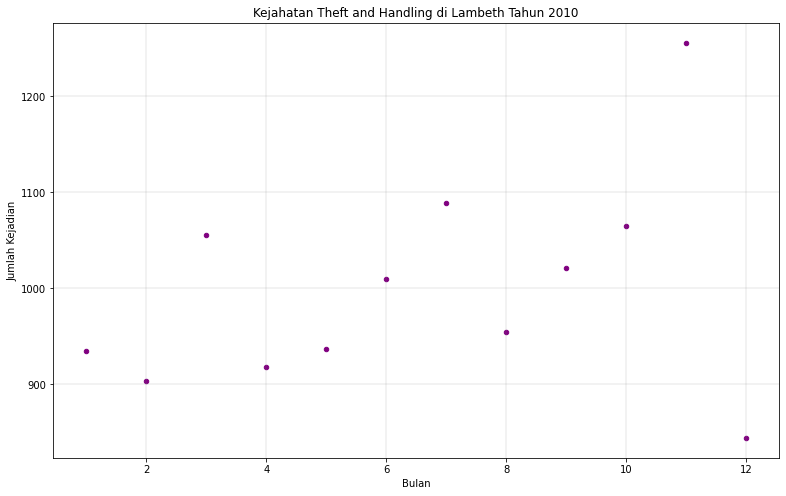

In [28]:
#Membuat scatter plot
axis1 = thefLamCrime_grafik.plot(kind="scatter",
                         x="month",
                         y="Theft and Handling",
                         figsize=(13, 8),
                         color="purple")


plt.title("Kejahatan Theft and Handling di Lambeth Tahun 2010")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Kejadian")
plt.grid(color="grey", linewidth=0.2)

plt.show()

Kesimpulan yang diperoleh dari gambar diatas yaitu:
- Pada tahun 2010, kejahatan Theft and Handling di wilayah Lambeth paling banyak terjadi pada bulan ke-11 yakni November dan paling jarang terjadi pada bulan ke-12 (Desember).
- Angka kejahatan Theft and Handling yang terjadi selama setahun di tahun 2010 terus mengalami naik turun yang tidak pasti.

## Word Clouds
#### Menampilkan data bentuk teks dalam jumlah besar dan membantu pengguna teks yang paling menonjol dengan cepat

##### Apa kejahatan minor yang terlihat paling menonjol dengan jumlah total terbesar?

In [29]:
#Membuat tabel borough sebagai set index dan year sebagai kolom
dataMinorC = df.pivot_table(values="value",
                        index=["minor_category"],
                        columns=["year"],
                        aggfunc=np.sum,
                        fill_value=0)
#Menambahkan kolom total
dataMinorC["Total"] = dataMinorC.sum(axis=1)

dataMinorC

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
minor_category,,,,,,,,,,
Assault with Injury,56586,55297,54173,50768,50369,39929,45677,48164,50038,451001
Burglary in Other Buildings,31437,30434,29703,30876,31676,30685,27078,25833,25289,263011
Burglary in a Dwelling,56655,60185,57123,62439,61716,56537,48975,44656,42996,491282
Business Property,2964,3115,3041,2685,2450,2026,1642,1718,1654,21295
Common Assault,37356,39671,41591,40502,39246,37882,51244,61758,64440,413690
Counted per Victim,3840,0,0,0,0,0,0,0,0,3840
Criminal Damage To Dwelling,23519,22475,20253,18037,15330,13512,13391,13648,13951,154116
Criminal Damage To Motor Vehicle,41693,36621,32907,29494,25777,23452,24137,25595,25787,265463
Criminal Damage To Other Building,9011,8348,7962,7445,6753,6367,6641,6776,6700,66003


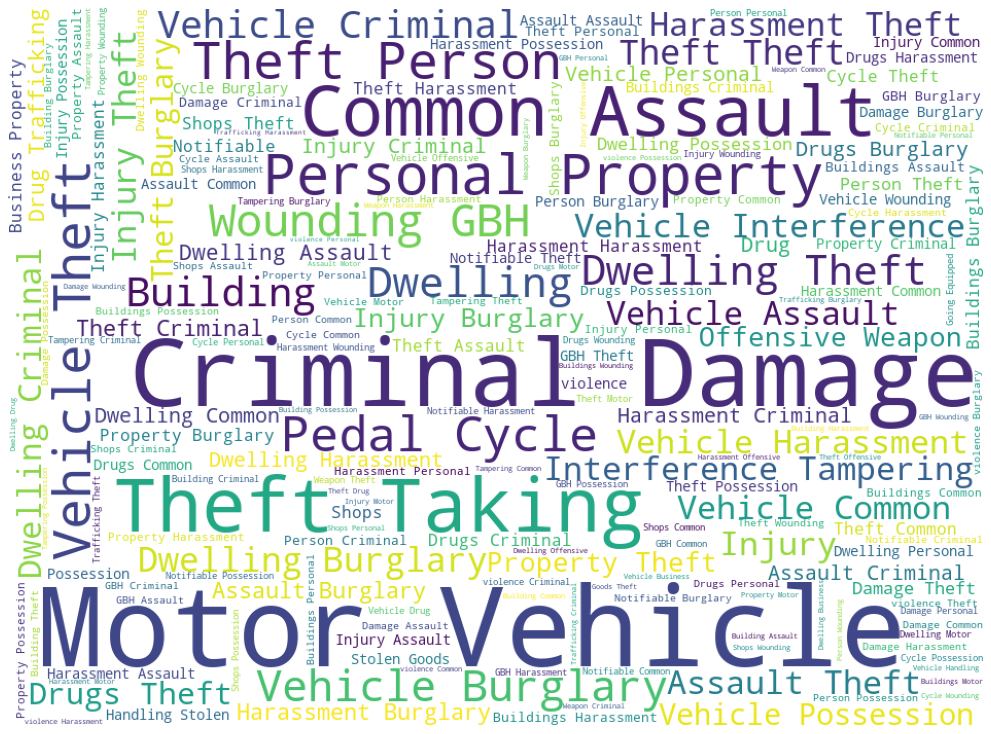

In [30]:
df_frac = df.sample(frac=0.1)

wordcloud = WordCloud(width = 950, height = 700, background_color ="white")

word_string = " ".join(cat for cat in df_frac["minor_category"]) + " " + " ".join(cat for cat in df_frac["minor_category"])

wordcloud.generate(word_string)

# Membuat plot word cloud
plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Dari kata yang menonjol pada wordclouds di atas dapat disimpulkan bahwa:
- Theft dan Motor Vehicle menjadi kejahatan minor yang paling menonjol, itu artinya merupakan kejahatan dengan jumlah total terbesar.

## Folium Maps

##### Bagaimana visualisasi top 5 wilayah (borough) dengan tingkat kejahatan terbanyak?

In [31]:
#Membuat dataframe copy
mapLondonCrime = df.copy()

mapLondonCrime = mapLondonCrime.groupby("borough")["value"].sum().sort_values(ascending=False)
mapLondonCrime = pd.DataFrame(mapLondonCrime).reset_index()
mapLondonCrime

,borough,value
0,Westminster,455028
1,Lambeth,292178
2,Southwark,278809
3,Camden,275147
4,Newham,262024
5,Croydon,260294
6,Ealing,251562
7,Islington,230286
8,Tower Hamlets,228613
9,Brent,227551


In [32]:
#Top 5 borough
boroughTeratas = mapLondonCrime.head()
boroughTeratas

#Longitude
boroughTeratas.insert(2, 'X', ['-0.135278', '-0.123068', '-0.0833', '-0.140556', '0.035216'])

#Latitude
boroughTeratas.insert(3, 'Y', ['51.494720', '51.457148', '51.4500', '51.536388', '51.525516'])
boroughTeratas.head()

,borough,value,X,Y
0,Westminster,455028,-0.135278,51.494720
1,Lambeth,292178,-0.123068,51.457148
2,Southwark,278809,-0.0833,51.4500
3,Camden,275147,-0.140556,51.536388
4,Newham,262024,0.035216,51.525516


In [33]:
#Membuat map
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=12)

#Instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(london_map)

#Loop through the 100 crimes and add each to the map
for lat, lng, label in zip(boroughTeratas.Y, boroughTeratas.X, boroughTeratas.borough):
        folium.Marker(
            location = [lat, lng],
            icon=None,
            popup = label
    ).add_to(incidents)
    
    
# Display the map
london_map.add_child(incidents)

Dari maps di atas dapat dilihat pemvisualisasian top 5 borough yang memiliki total kejadian kejahatan terbanyak, yakni Westminster, Lambeth, Southwark, Camden, Newham

## Overall Analysis
**1. Borough**
- Top 5 wilayah dengan terjadinya kejahatan terbanyak ialah Westminster, Lambeth, Southwark, Camden, dan Newham.
- Wilayah dengan terjadinya kejahatan terbanyak berada di Westminter dengan total kejahatan 455028 dan paling sedikit terdapat di wilayah City of London dengan total kejahatan 780 yang mana dapat dikatakan sangat jarang terjadi kejahatan dibanding dengan 30 wilayah lainnya.
- Perbandingan persentase pada wilayah top 5 yakni Westminter dengan 29,1%, disusul dengan Lambeth 18,7%, Southwark 17,8% , Camden 17,6%, serta Newham dengan 16,8%.

**2. Major Category**
- Urutan kejahatan major dari yang paling banyak terjadi yaitu Theft and Handling, Violence Against the Person, Burglary, Criminal Damage, Drugs, Robbery, Other Notifiable Offences, Fraud or Forgery, Sexual Offences.
- Kejahatan kategori Theft and Handling dan Violence Against the Person cenderung mengalami perubahan jumlah kejahatan yang signifikan dibanding kejahatan lainnya yang cenderung stabil dalam pergerakam tiap tahunnya.
- Perbandingan yang terjadi pada kejahatan major terbanyak terjadi dengan tersedikit memiliki jumlah yang terpaut jauh, yakni Theft and Handling dengan jumlah 2661861 dan yang paling sedikit ialah kejahatan Sexual Offences.

**3. Minor Category**
- Top 3 kejahatan minor yang paling banyak terjadi sepanjang tahun ialah Other Theft, Theft from Motor Vehicle, Burglary in a Dwelling.
- Kejahatan minor yang paling banyak terjadi ialah Other Theft sejumlah 980085 kejahatan, sedangkan Rape sebagai kejahatan minor yang paling sedikit terjadi berjumlah 268 kejahatan. Ini membuktikan kecenderungan yang terjadi dalam kejahatan minor sangatlah jauh berbeda.